# IST 652 - Final Project
- Spring 2022
- Professor: Jillian Lando
- Team members: Nora Lin and Michael Morrey

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Obtaining and cleaning Glassdoor data:

In [2]:
#Read in CSV file using pandas and store in data frame
#source: https://www.kaggle.com/datasets/nikhilbhathi/data-scientist-salary-us-glassdoor
#year = 2021
dfDataScience = pd.read_csv('data_cleaned_2021.csv', sep=',')

#Examine shape of data frame
dfDataScience.shape

(742, 42)

In [3]:
#Examine first five rows of data frame
dfDataScience.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [4]:
#Examine all column headers of data frame to get full list
#dfDataScience.columns.values.tolist()

In [5]:
#Drop columns that will not be analyzed
dfDataScience = dfDataScience.drop(columns=['index', 
                                            'Job Title', #job_title_sim has more simplified titles. Will use this instead.
                                            'Salary Estimate', #Lower Salary, Upper Salary, and Avg Salary(K) will be used instead
                                            'Job Description', 
                                            'Headquarters',
                                            'Size', 
                                            'Founded', 
                                            'Type of ownership', 
                                            'Revenue', 
                                            'Competitors', 
                                            'Hourly',
                                            'Employer provided',
                                            'Company Name', #company_txt contains cleaner values. Will use this instead.
                                            'Age',
                                            'seniority_by_title'
                                           ], axis=1)

In [6]:
#Examine remaining column header names - need to rename many of these
#dfDataScience.columns.values.tolist()

In [7]:
#Rename columns so they make sense and are consistent
dfDataScience = dfDataScience.rename(columns = {'company_txt': 'Company_Name', 
                                'Lower Salary':'Lower_Salary',
                                'Upper Salary':'Upper_Salary',
                                'Avg Salary(K)':'Avg_Salary',
                                'Job Location':'Job_State',
                                'spark':'Spark',
                                'aws':'AWS',
                                'excel':'Excel',
                                'sql':'SQL',
                                'sas':'SAS',
                                'keras':'Keras',
                                'pytorch':'Pytorch',
                                'scikit':'Scikit',
                                'tensor':'Tensor',
                                'hadoop':'Hadoop',
                                'tableau':'Tableau',
                                'bi':'BI',
                                'flink':'Flink',
                                'mongo' : 'Mongo',
                                'google_an' : 'Google_Analytics',
                                'job_title_sim' : 'Job_Title'
                               })

#Examine first 5 rows with new column names
dfDataScience.head()

,Rating,Location,Industry,Sector,Lower_Salary,Upper_Salary,Avg_Salary,Company_Name,Job_State,Python,...,Scikit,Tensor,Hadoop,Tableau,BI,Flink,Mongo,Google_Analytics,Job_Title,Degree
0,3.8,"Albuquerque, NM",Aerospace & Defense,Aerospace & Defense,53,91,72.0,Tecolote Research,NM,1,...,0,0,0,1,1,0,0,0,data scientist,M
1,3.4,"Linthicum, MD",Health Care Services & Hospitals,Health Care,63,112,87.5,University of Maryland Medical System,MD,1,...,0,0,0,0,0,0,0,0,data scientist,M
2,4.8,"Clearwater, FL",Security Services,Business Services,80,90,85.0,KnowBe4,FL,1,...,0,0,0,0,0,0,0,0,data scientist,M
3,3.8,"Richland, WA",Energy,"Oil, Gas, Energy & Utilities",56,97,76.5,PNNL,WA,1,...,0,0,0,0,0,0,0,0,data scientist,na
4,2.9,"New York, NY",Advertising & Marketing,Business Services,86,143,114.5,Affinity Solutions,NY,1,...,0,0,0,0,0,0,0,0,data scientist,na


In [8]:
#testing indexing:
cols = dfDataScience.columns.tolist()
cols[-2:-1]

['Job_Title']

In [9]:
#For better column grouping and ordering, bringing new Job_Title and Company_Name columns to beginning of data frame
#Putting column names into list
cols = dfDataScience.columns.tolist()

#Rearranging column names with Job_Title at the front
cols = cols[-2:-1] + cols[7:8] + cols[0:7] + cols[8:25] + cols[-1:]

#Update data frame with new column order
dfDataScience = dfDataScience[cols]

#Examine new data frame to make sure Job_Title and Company_Name are first columns
dfDataScience.head()

,Job_Title,Company_Name,Rating,Location,Industry,Sector,Lower_Salary,Upper_Salary,Avg_Salary,Job_State,...,Pytorch,Scikit,Tensor,Hadoop,Tableau,BI,Flink,Mongo,Google_Analytics,Degree
0,data scientist,Tecolote Research,3.8,"Albuquerque, NM",Aerospace & Defense,Aerospace & Defense,53,91,72.0,NM,...,0,0,0,0,1,1,0,0,0,M
1,data scientist,University of Maryland Medical System,3.4,"Linthicum, MD",Health Care Services & Hospitals,Health Care,63,112,87.5,MD,...,0,0,0,0,0,0,0,0,0,M
2,data scientist,KnowBe4,4.8,"Clearwater, FL",Security Services,Business Services,80,90,85.0,FL,...,0,0,0,0,0,0,0,0,0,M
3,data scientist,PNNL,3.8,"Richland, WA",Energy,"Oil, Gas, Energy & Utilities",56,97,76.5,WA,...,0,0,0,0,0,0,0,0,0,na
4,data scientist,Affinity Solutions,2.9,"New York, NY",Advertising & Marketing,Business Services,86,143,114.5,NY,...,0,0,0,0,0,0,0,0,0,na


In [10]:
#Examine data types of each variable
dfDataScience.dtypes

Job_Title            object
Company_Name         object
Rating              float64
Location             object
Industry             object
Sector               object
Lower_Salary          int64
Upper_Salary          int64
Avg_Salary          float64
Job_State            object
Python                int64
Spark                 int64
AWS                   int64
Excel                 int64
SQL                   int64
SAS                   int64
Keras                 int64
Pytorch               int64
Scikit                int64
Tensor                int64
Hadoop                int64
Tableau               int64
BI                    int64
Flink                 int64
Mongo                 int64
Google_Analytics      int64
Degree               object
dtype: object

In [11]:
#Examine numeric variable statistics
dfDataScience.describe()

,Rating,Lower_Salary,Upper_Salary,Avg_Salary,Python,Spark,AWS,Excel,SQL,SAS,Keras,Pytorch,Scikit,Tensor,Hadoop,Tableau,BI,Flink,Mongo,Google_Analytics
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,74.754717,128.214286,101.484501,0.528302,0.225067,0.237197,0.522911,0.512129,0.088949,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,0.801210,30.945892,45.128650,37.482449,0.499535,0.417908,0.425651,0.499812,0.500190,0.284862,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,-1.000000,15.000000,16.000000,15.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,52.000000,96.000000,73.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,69.500000,124.000000,97.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,91.000000,155.000000,122.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,202.000000,306.000000,254.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#looking at ratings that are -1:
negativerating = dfDataScience.loc[dfDataScience['Rating']==-1]
#index values of the negative ratings:
index_negativerating = negativerating.index.values

In [13]:
#Rating has a min of -1, which indicates that those values were not successfully scrubbed.
#Will drop those values:
dfDataScience = dfDataScience.drop(labels=index_negativerating,axis=0)

#Examine rating column again to make sure min is no longer -1
dfDataScience['Rating'].describe()

count    731.000000
mean       3.688372
std        0.570353
min        1.900000
25%        3.300000
50%        3.700000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

In [14]:
#Identify remaining columns with -1 values.
ValuePresent=[]
for column in dfDataScience:
    ValuePresent.append('-1' in dfDataScience[column].values)


colNames=[]
for col in dfDataScience.columns:
    colNames.append(col)
    
for x, y in zip(colNames, ValuePresent):
    print('{} has -1 value: {}'.format(x, y))

Job_Title has -1 value: False
Company_Name has -1 value: False
Rating has -1 value: False
Location has -1 value: False
Industry has -1 value: True
Sector has -1 value: True
Lower_Salary has -1 value: False
Upper_Salary has -1 value: False
Avg_Salary has -1 value: False
Job_State has -1 value: False
Python has -1 value: False
Spark has -1 value: False
AWS has -1 value: False
Excel has -1 value: False
SQL has -1 value: False
SAS has -1 value: False
Keras has -1 value: False
Pytorch has -1 value: False
Scikit has -1 value: False
Tensor has -1 value: False
Hadoop has -1 value: False
Tableau has -1 value: False
BI has -1 value: False
Flink has -1 value: False
Mongo has -1 value: False
Google_Analytics has -1 value: False
Degree has -1 value: False


C:\Users\Michael\AppData\Local\Temp/ipykernel_16120/1529689587.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ValuePresent.append('-1' in dfDataScience[column].values)


In [15]:
#Industry and Sector contain -1 values. We will replace these values with 'Unknown'
dfDataScience['Industry'] = dfDataScience['Industry'].replace('-1', 'Unknown')
dfDataScience['Sector'] = dfDataScience['Sector'].replace('-1', 'Unknown')

In [16]:
#Make sure -1 is no longer in Industry or Sector columns
print('-1' in dfDataScience['Industry'].values)
print('-1' in dfDataScience['Sector'].values)

False
False


In [17]:
#Checking for any missing values
dfDataScience.isnull().values.any()

False

In [18]:
#Kaggle dataset description mentioned "na" string values in Degree column, indicating degree not required
#Confirm this by listing unique values in Degree column
print(dfDataScience['Degree'].unique())

['M' 'na' 'P']


In [19]:
#Confirmed na value is present. Replacing these values with "Not Required"
dfDataScience['Degree'] = dfDataScience['Degree'].replace('na', 'Not Required')
#Printing unique values of Degree column to confirm na updated successfully
print(dfDataScience['Degree'].unique())

['M' 'Not Required' 'P']


In [20]:
#examine that there are the appropriate number of states:
len(dfDataScience.Job_State.unique())
#there are only 37 states

37

In [21]:
#creating a column that totals the number of skills:
dfDataScience['Total_Skills']= dfDataScience['Python']+dfDataScience['Spark']+dfDataScience['AWS']+dfDataScience['Excel']+dfDataScience['SQL']+dfDataScience['SAS']+dfDataScience['Keras']+dfDataScience['Pytorch']+dfDataScience['Scikit']+dfDataScience['Tensor']+dfDataScience['Hadoop']+dfDataScience['Tableau']+dfDataScience['BI']+dfDataScience['Flink']+dfDataScience['Mongo']+dfDataScience['Google_Analytics']

In [22]:
#dropping duplicates:
dfDataScience = dfDataScience.drop_duplicates()

In [23]:
#Dataset is now cleaned. Displaying first five rows of cleaned dataset.
dfDataScience.head()

,Job_Title,Company_Name,Rating,Location,Industry,Sector,Lower_Salary,Upper_Salary,Avg_Salary,Job_State,...,Scikit,Tensor,Hadoop,Tableau,BI,Flink,Mongo,Google_Analytics,Degree,Total_Skills
0,data scientist,Tecolote Research,3.8,"Albuquerque, NM",Aerospace & Defense,Aerospace & Defense,53,91,72.0,NM,...,0,0,0,1,1,0,0,0,M,5
1,data scientist,University of Maryland Medical System,3.4,"Linthicum, MD",Health Care Services & Hospitals,Health Care,63,112,87.5,MD,...,0,0,0,0,0,0,0,0,M,1
2,data scientist,KnowBe4,4.8,"Clearwater, FL",Security Services,Business Services,80,90,85.0,FL,...,0,0,0,0,0,0,0,0,M,5
3,data scientist,PNNL,3.8,"Richland, WA",Energy,"Oil, Gas, Energy & Utilities",56,97,76.5,WA,...,0,0,0,0,0,0,0,0,Not Required,1
4,data scientist,Affinity Solutions,2.9,"New York, NY",Advertising & Marketing,Business Services,86,143,114.5,NY,...,0,0,0,0,0,0,0,0,Not Required,4


In [24]:
len(dfDataScience)

457

# Data exploration on Glassdoor Data:

### 1) What is the distribution of job titles?

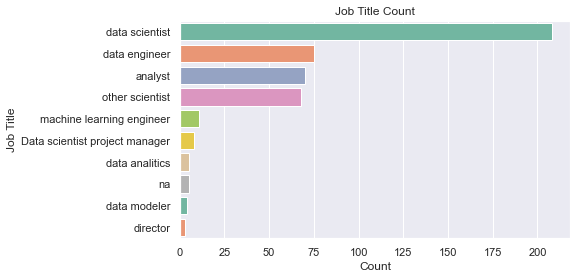

In [25]:
sns.set(rc={'figure.figsize':(7,4)})
sns.countplot(y='Job_Title',data=dfDataScience,palette='Set2',order=dfDataScience.Job_Title.value_counts().index)
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Job Title Count')
plt.show()

## 2) What is the distribution of rating by Job Title?

In [26]:
rating_by_title = dfDataScience.groupby(['Job_Title'])['Rating'].mean().reset_index()
rating_by_title = rating_by_title.sort_values(by='Rating',ascending=False)
rating_by_title

,Job_Title,Rating
8,na,4.060000
2,data analitics,4.040000
6,director,4.000000
4,data modeler,3.975000
3,data engineer,3.808000
0,Data scientist project manager,3.800000
5,data scientist,3.785577
1,analyst,3.654286
7,machine learning engineer,3.518182
9,other scientist,3.469118


## 3) What are the top 5 cities that have the most jobs?

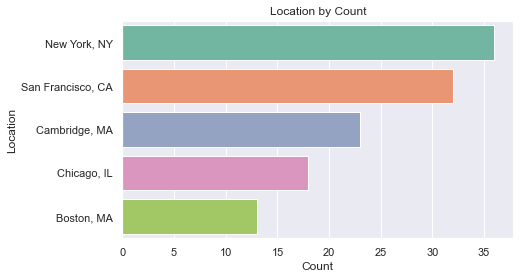

In [27]:
sns.countplot(y='Location',data=dfDataScience,
              palette='Set2',order=dfDataScience.Location.value_counts().iloc[:5].index)
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Location by Count')
plt.show()

## 4) Are the top 5 states the same as the top 5 cities that have the most jobs?

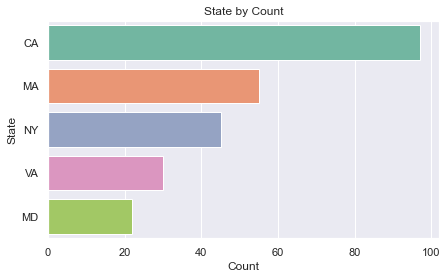

In [28]:
sns.countplot(y='Job_State',data=dfDataScience,
              palette='Set2',order=dfDataScience.Job_State.value_counts().iloc[:5].index)
plt.xlabel('Count')
plt.ylabel('State')
plt.title('State by Count')
plt.show()

## 5) What is the distribution of salaries by job_title?

In [29]:
len(dfDataScience)

457

In [30]:
salaries = dfDataScience.drop(dfDataScience[(dfDataScience.Job_Title=='data analitics')].index)
salaries = salaries.drop(salaries[(salaries.Job_Title=='na')].index)
salaries = salaries.drop(salaries[(salaries.Job_Title=='director')].index)
#salaries = salaries.drop(salaries[(salaries.Job_Title=='Data scientist project manager')].index)
salaries = salaries.drop(salaries[(salaries.Job_Title=='data modeler')].index)
len(salaries)

440

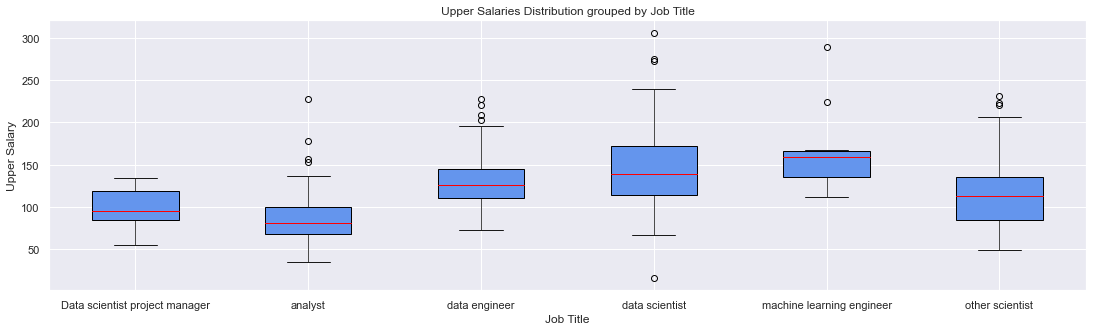

In [31]:
plot2= salaries.boxplot(column='Upper_Salary',by='Job_Title',figsize=(18,5),
                            patch_artist=True,vert=True,medianprops=dict(color='red'),
                            boxprops=dict(facecolor='cornflowerblue'))
plot2.plot()
plt.ylabel('Upper Salary')
plt.xlabel('Job Title')
plt.suptitle('')
plt.title('Upper Salaries Distribution grouped by Job Title')
plt.show()

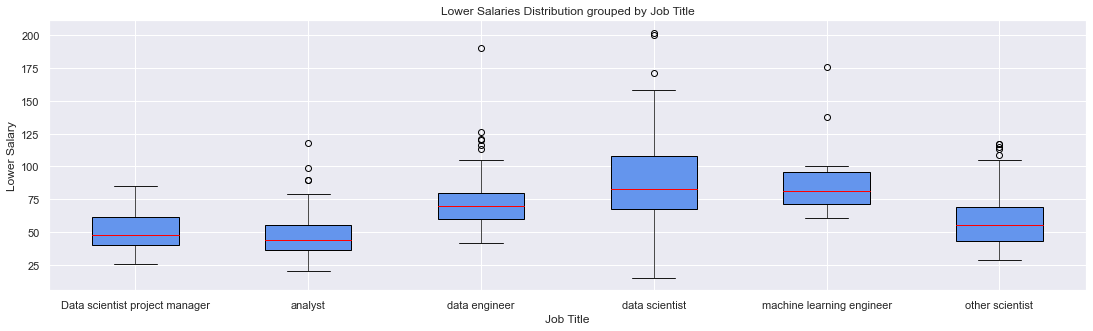

In [32]:
plot3= salaries.boxplot(column='Lower_Salary',by='Job_Title',figsize=(18,5),
                            patch_artist=True,vert=True,medianprops=dict(color='red'),
                            boxprops=dict(facecolor='cornflowerblue'))
plot3.plot()
plt.ylabel('Lower Salary')
plt.xlabel('Job Title')
plt.suptitle('')
plt.title('Lower Salaries Distribution grouped by Job Title')
plt.show()

## 6) Do certain job titles require different degrees?

In [33]:
# M is masters, P is PhD:
m = dfDataScience[dfDataScience.Degree=='M']
p = dfDataScience[dfDataScience.Degree=='P']
#n = dfDataScience[dfDataScience.Degree=='Not Required'] 
# Since missing degree inputs does not necessarily mean that the company doesn't require a degree
#So we will just graph masters and phds 

In [34]:
degree_m = m.groupby(['Job_Title'])['Degree'].count().reset_index()
degree_m = degree_m.rename(columns={'Degree':'Masters'})
degree_p = p.groupby(['Job_Title'])['Degree'].count().reset_index()
degree_p = degree_p.rename(columns={'Degree':'PhD'})
#degree_n = n.groupby(['Job_Title'])['Degree'].count().reset_index()
#degree_n = degree_n.rename(columns={'Degree':'Degree_Not_Required'})

In [35]:
degree_job = degree_m.merge(degree_p,how='left')
#degree_job = degree_job.merge(degree_n,how="left")
degree_job['PhD'] = degree_job['PhD'].fillna(0)
degree_job = degree_job.drop(degree_job[(degree_job.Job_Title=='na')].index)
degree_job = degree_job.drop(degree_job[(degree_job.Job_Title=='data analitics')].index)
degree_job = degree_job.drop(degree_job[(degree_job.Job_Title=='data modeler')].index)

<AxesSubplot:ylabel='Job_Title'>

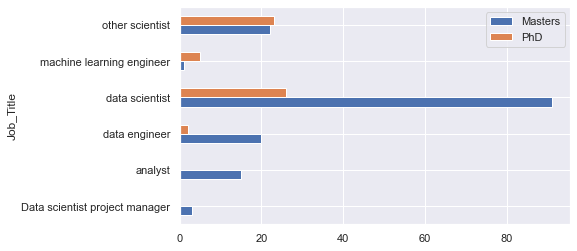

In [36]:
degree_job.plot(x="Job_Title",y=["Masters","PhD"],kind='barh')

## 7) Which company has the highest average salary among data scientists?

In [37]:
max_data_scientist = dfDataScience[dfDataScience['Job_Title']=='data scientist']
max_data_scientist = max_data_scientist.sort_values(by='Avg_Salary',ascending=False).head(5)
max_data_scientist

,Job_Title,Company_Name,Rating,Location,Industry,Sector,Lower_Salary,Upper_Salary,Avg_Salary,Job_State,...,Scikit,Tensor,Hadoop,Tableau,BI,Flink,Mongo,Google_Analytics,Degree,Total_Skills
354,data scientist,Liberty Mutual Insurance,3.3,"Chicago, IL",Insurance Carriers,Insurance,202,306,254.0,IL,...,0,0,0,0,0,0,0,0,M,2
103,data scientist,Gallup,4.2,"Washington, DC",Consulting,Business Services,200,275,237.5,DC,...,0,0,0,0,0,0,0,0,M,2
613,data scientist,Grand Rounds,4.2,"San Francisco, CA",Health Care Services & Hospitals,Health Care,171,272,221.5,CA,...,0,0,0,0,0,0,0,0,Not Required,3
410,data scientist,Liberty Mutual Insurance,3.3,"Chicago, IL",Insurance Carriers,Insurance,150,239,194.5,IL,...,0,0,0,0,0,0,0,0,P,2
507,data scientist,The Climate Corporation,3.2,"San Francisco, CA",Enterprise Software & Network Solutions,Information Technology,150,238,194.0,CA,...,0,0,0,0,0,0,0,0,Not Required,2


## 8) Which company has the lowest average salary among data scientists?

In [38]:
low_data_scientist = dfDataScience[dfDataScience['Job_Title']=='data scientist']
low_data_scientist = low_data_scientist.sort_values(by='Avg_Salary',ascending=True).head(5)
low_data_scientist

,Job_Title,Company_Name,Rating,Location,Industry,Sector,Lower_Salary,Upper_Salary,Avg_Salary,Job_State,...,Scikit,Tensor,Hadoop,Tableau,BI,Flink,Mongo,Google_Analytics,Degree,Total_Skills
240,data scientist,NPD,3.9,"Port Washington, NY",Research & Development,Business Services,15,16,15.5,NY,...,0,0,0,0,0,0,0,0,Not Required,1
648,data scientist,Liberty Mutual Insurance,3.3,"Boston, MA",Insurance Carriers,Insurance,39,67,53.0,MA,...,0,0,0,0,0,0,0,0,M,0
67,data scientist,C Space,3.1,"Boston, MA",Advertising & Marketing,Business Services,41,72,56.5,MA,...,0,0,0,1,0,0,0,0,Not Required,3
383,data scientist,Santander,3.1,"Boston, MA",Banks & Credit Unions,Finance,43,82,62.5,MA,...,0,0,0,0,0,0,0,0,M,4
595,data scientist,Tapjoy,3.9,"San Francisco, CA",Internet,Information Technology,40,87,63.5,CA,...,1,1,0,0,0,0,0,0,Not Required,5


## 9) How are the variables related to each other?

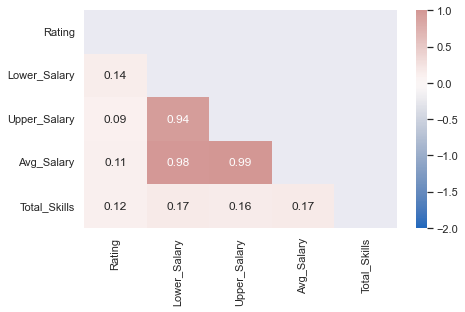

In [39]:
cor = dfDataScience.drop(['Job_Title','Company_Name','Location','Industry','Sector',
                         'Job_State','Degree','Python','AWS','SQL','Keras','Scikit',
                         'Hadoop','BI','Mongo','Google_Analytics','Spark','Excel',
                         'SAS','Pytorch','Tensor','Tableau','Flink'],axis=1)
matrix = cor.corr().round(2)
masks =np.triu(np.ones_like(matrix,dtype=bool))
sns.heatmap(matrix,annot=True,vmax=1,vmin=-2,center=0,cmap='vlag',mask=masks)
plt.show()

## 10) What are the most highly sought after data science skills for each job title?

In [40]:
#pd.melt(dfDataScience,id_vars=["SizeRank","State","City"],var_name="Date",value_name="Value")
job_skills = pd.melt(dfDataScience, id_vars=["Job_Title"], value_vars=["Python","Spark","AWS","Excel","SQL","SAS","Pytorch",
                                                         "Scikit","Tensor","Hadoop","Tableau","BI","Flink","Mongo",
                                                         "Google_Analytics"],var_name="Skill",value_name="Skill_Count")

In [41]:
dfTitleSkills = job_skills.groupby(['Job_Title','Skill'])['Skill_Count'].sum().reset_index().sort_values(by=['Skill_Count'], ascending=True)

In [42]:
titles=['machine learning engineer','data engineer','Data scientist project manager','analyst','data scientist','other scientist']
dfTitleSkills = dfTitleSkills.loc[dfTitleSkills['Job_Title'].isin(titles)]

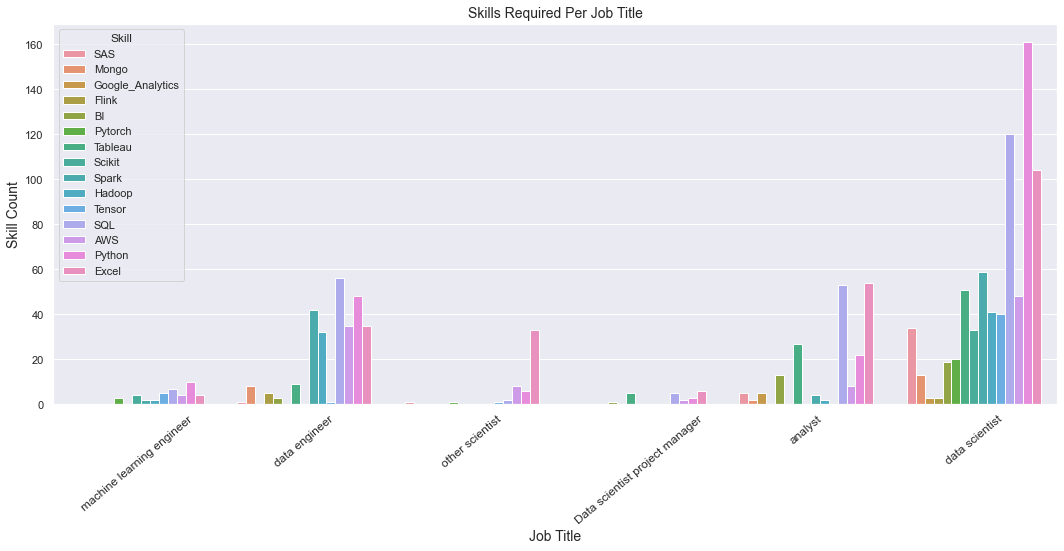

In [55]:
sns.set(rc={'figure.figsize':(18,7)})
sns.barplot(x="Job_Title", y="Skill_Count", hue="Skill", data=dfTitleSkills)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Skill Count', fontsize=14)
plt.title('Skills Required Per Job Title', fontsize=14)
plt.xticks(rotation=40, fontsize=12)
#plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

# Obtaining and Cleaning Zillow Housing Prices Data:

In [39]:
#importing in the data from Zillow
zillow=pd.read_csv("http://files.zillowstatic.com/research/public_csvs/zhvi/Zip_zhvi_uc_sfr_month.csv")

In [40]:
#observing shape:
zillow.shape

(29770, 325)

In [41]:
#getting rid of the columns we don't need:
zillow = zillow.drop(columns=['RegionID','RegionName','RegionType','StateName','Metro','CountyName'])
zillow.head()

,SizeRank,State,City,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,...,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30
0,0,NY,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.851264e+06,2.770188e+06,2.687514e+06,2.663061e+06,2.646544e+06,2.609147e+06,2.778255e+06,2.801284e+06,2.811154e+06,2.909677e+06
1,1,IL,Chicago,322189.149894,322710.085359,321007.457673,327697.535693,329308.867125,332447.379844,332698.511175,...,8.175231e+05,8.160084e+05,8.126675e+05,8.253859e+05,8.261098e+05,8.253409e+05,8.365556e+05,8.406963e+05,8.511393e+05,8.586874e+05
2,2,NY,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.263642e+06,5.491636e+06,5.551599e+06,5.242290e+06,5.202065e+06,5.172925e+06,5.169777e+06,5.028796e+06,5.278321e+06,5.040012e+06
3,3,TX,Katy,178432.259845,182070.524431,181766.421892,179501.989563,184095.761772,182947.579832,188531.326138,...,4.382852e+05,4.462612e+05,4.531777e+05,4.601335e+05,4.654635e+05,4.682983e+05,4.781900e+05,4.957764e+05,5.077550e+05,5.252401e+05
4,4,IL,Chicago,435527.325981,436349.814011,433475.108499,439745.376601,442327.636933,448099.360481,449764.479004,...,1.115089e+06,1.108694e+06,1.104505e+06,1.118697e+06,1.119498e+06,1.115676e+06,1.129559e+06,1.131831e+06,1.146828e+06,1.156474e+06


In [42]:
#configuring dataset:
zillow = zillow.copy()
zillow=pd.melt(zillow,id_vars=["SizeRank","State","City"],var_name="Date",value_name="Value")

In [43]:
#locating only entries from 2021
zillow = zillow.loc[(zillow['Date']=='2021-01-31')|(zillow['Date']=='2021-02-28')|(zillow['Date']=='2021-03-31')
                   |(zillow['Date']=='2021-04-30')|(zillow['Date']=='2021-05-31')|(zillow['Date']=='2021-06-30')
                   |(zillow['Date']=='2021-07-31')|(zillow['Date']=='2021-08-31')|(zillow['Date']=='2021-09-30')
                   |(zillow['Date']=='2021-10-30')|(zillow['Date']=='2021-11-31')|(zillow['Date']=='2021-12-31')]

In [44]:
#creating new column
zillow['Location']=zillow['City']+', '+zillow['State']

In [45]:
#Creating new dataframe that still contains state, for later EDA
zillowEDA = zillow
#dropping zillowEDA columns:
zillowEDA = zillowEDA.drop(columns=['City','SizeRank'],axis=1)

In [46]:
#dropping columns:
zillow = zillow.drop(columns=['State','City','SizeRank'],axis=1)

In [47]:
zillow.head()

,Date,Value,Location
8931000,2021-01-31,2.920803e+06,"New York, NY"
8931001,2021-01-31,7.849704e+05,"Chicago, IL"
8931002,2021-01-31,4.553987e+06,"New York, NY"
8931003,2021-01-31,3.798471e+05,"Katy, TX"
8931004,2021-01-31,1.071492e+06,"Chicago, IL"


In [48]:
#creating aggregate
#zillow = zillow.groupby(['Location'])['Value'].mean().reset_index()
zillow = zillow.groupby(['Location'])['Value'].median().reset_index()

In [49]:
#rounding values
zillow['Value']=zillow['Value'].round(2)

In [50]:
zillow.head()

,Location,Value
0,"Abbeville, AL",132690.49
1,"Abbeville, GA",96664.09
2,"Abbeville, LA",162390.13
3,"Abbeville, MS",163898.44
4,"Abbeville, SC",158424.17


# Data Exploration on Zillow:

### 1) How do the states compare in median home value?

In [51]:
#creating aggregate
zillowStates = zillowEDA.groupby(['State'])['Value'].median().reset_index()

In [52]:
#rounding values
zillowStates['Value']=zillowStates['Value'].round(2)

In [53]:
#Ordering by values descending
zillowStates = zillowStates.sort_values(by=['Value'], ascending=False)

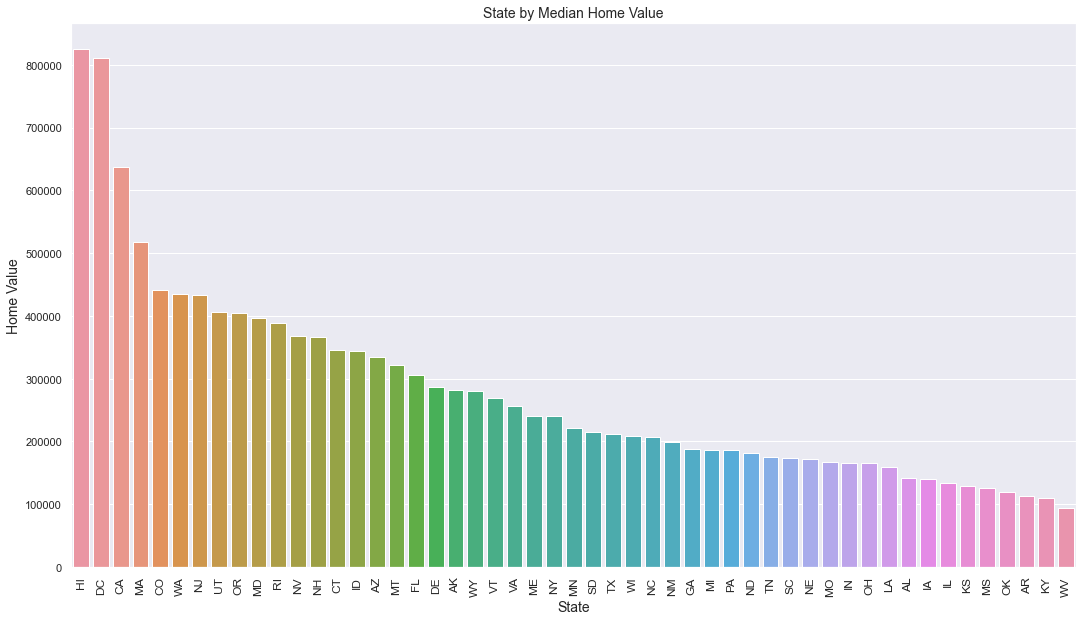

In [54]:
#Barplot displaying median home values by state
sns.set(rc={'figure.figsize':(18,10)})
sns.barplot(x="State", y="Value", data=zillowStates)
plt.xlabel('State', fontsize=14)
plt.ylabel('Home Value', fontsize=14)
plt.title('State by Median Home Value', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
#plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

### 2) What are the top 10 cities in median home value?

In [55]:
#Ordering by values descending
zillowT5 = zillow.sort_values(by=['Value'], ascending=False)
#Display top 10 cities in median home value
zillowT5.head(10)

,Location,Value
787,"Atherton, CA",8301180.34
15033,"Palm Beach, FL",8092794.82
17311,"Sagaponack, NY",6247408.65
9126,"Hollandale, MS",5464304.59
11870,"Malibu, CA",4802395.75
21229,"Water Mill, NY",4515366.51
761,"Aspen, CO",4351876.76
19491,"Teton Village, WY",4343340.86
12520,"Medina, WA",4333109.55
13140,"Montecito, CA",4276887.61


### 3) What are the bottom 10 cities in median home values?

In [56]:
#Ordering by values ascending
zillowB5 = zillow.sort_values(by=['Value'], ascending=True)
#Display bottom 10 cities in median home value
zillowB5.head(10)

,Location,Value
7395,"Gary, WV",16446.42
6049,"Elkhorn, WV",19520.52
21106,"War, WV",20561.27
1575,"Berwind, WV",21173.08
7581,"Girardville, PA",22318.31
2774,"Cairo, IL",22627.62
11839,"Mahanoy City, PA",22722.46
10218,"Keystone, WV",22752.20
16430,"Raysal, WV",23161.30
16597,"Rhodell, WV",24713.58


### 4) What is the distribution of home values by state?

In [57]:
#Create new data frame for distribution
zillowDist = zillowEDA
zillowDist['Value']=zillowDist['Value'].round(2)
#zillowDist.head()

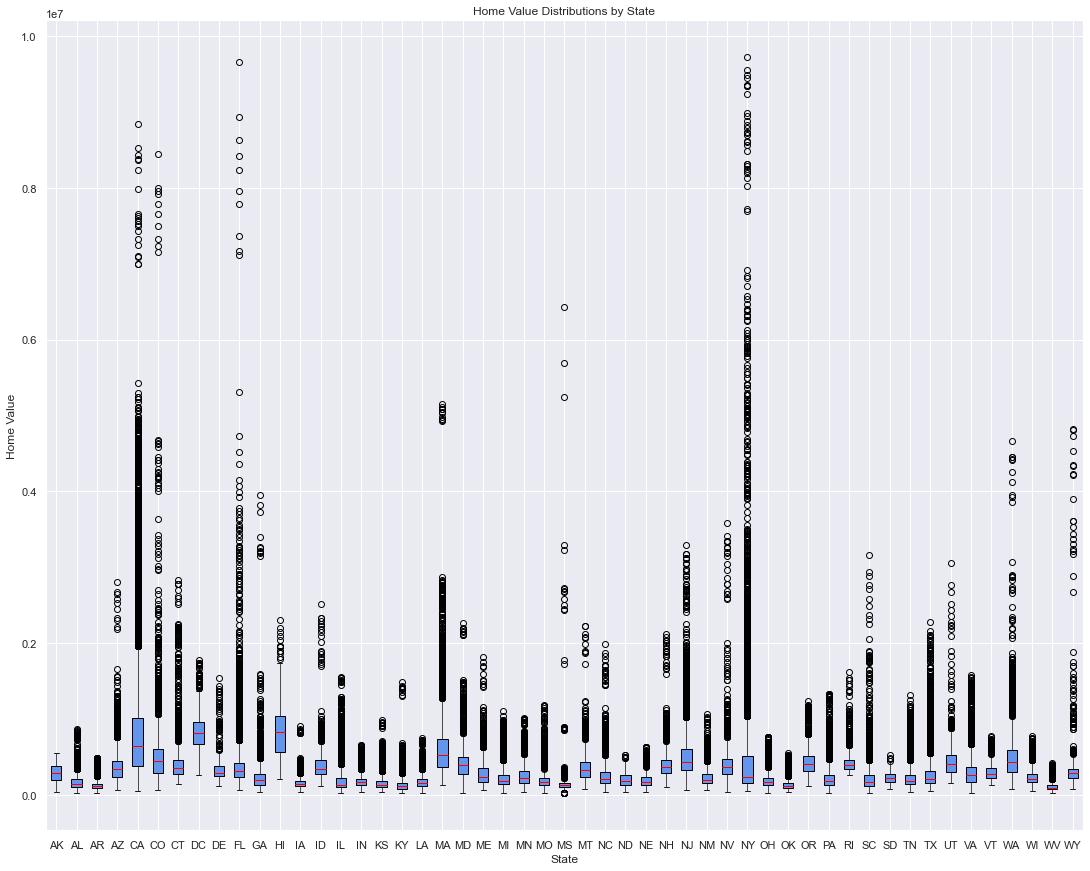

In [369]:
#Boxplot displaying state home value distributions
zillowPlot = zillowDist.boxplot(column='Value',by='State',figsize=(18, 15),
                            patch_artist=True,vert=True,medianprops=dict(color='red'),
                            boxprops=dict(facecolor='cornflowerblue'))
zillowPlot.plot()
plt.ylabel('Home Value')
plt.xlabel('State')
plt.suptitle('')
plt.title('Home Value Distributions by State')
plt.show()

# Merging Glassdoor and Zillow:

In [58]:
#Merging Glassdoor and Zillow datasets based on Location
dfMerged = dfDataScience.merge(zillow,how='left',left_on='Location',right_on='Location')
#Droping missing values
dfMerged = dfMerged.dropna()
dfMerged.head()

,Job_Title,Company_Name,Rating,Location,Industry,Sector,Lower_Salary,Upper_Salary,Avg_Salary,Job_State,...,Tensor,Hadoop,Tableau,BI,Flink,Mongo,Google_Analytics,Degree,Total_Skills,Value
0,data scientist,Tecolote Research,3.8,"Albuquerque, NM",Aerospace & Defense,Aerospace & Defense,53,91,72.0,NM,...,0,0,1,1,0,0,0,M,5,297347.52
2,data scientist,KnowBe4,4.8,"Clearwater, FL",Security Services,Business Services,80,90,85.0,FL,...,0,0,0,0,0,0,0,M,5,348388.77
3,data scientist,PNNL,3.8,"Richland, WA",Energy,"Oil, Gas, Energy & Utilities",56,97,76.5,WA,...,0,0,0,0,0,0,0,Not Required,1,402053.71
4,data scientist,Affinity Solutions,2.9,"New York, NY",Advertising & Marketing,Business Services,86,143,114.5,NY,...,0,0,0,0,0,0,0,Not Required,4,926612.70
5,data scientist,CyrusOne,3.4,"Dallas, TX",Real Estate,Real Estate,71,119,95.0,TX,...,0,0,0,1,0,1,0,Not Required,6,378837.12


In [59]:
len(dfMerged)
#glassdoor data set has 457 rows, so we lost a small amount of rows

434

In [60]:
#selecting relevant columns:
housing = dfMerged[['Job_Title','Company_Name','Location','Industry','Avg_Salary','Value']]
housing.head()

,Job_Title,Company_Name,Location,Industry,Avg_Salary,Value
0,data scientist,Tecolote Research,"Albuquerque, NM",Aerospace & Defense,72.0,297347.52
2,data scientist,KnowBe4,"Clearwater, FL",Security Services,85.0,348388.77
3,data scientist,PNNL,"Richland, WA",Energy,76.5,402053.71
4,data scientist,Affinity Solutions,"New York, NY",Advertising & Marketing,114.5,926612.70
5,data scientist,CyrusOne,"Dallas, TX",Real Estate,95.0,378837.12


In [61]:
#Add monhly income column to housing dataset
housing['Monthly_Income'] = (housing['Avg_Salary'] * 1000) / 12
#rounding values
housing['Monthly_Income']=housing['Monthly_Income'].round(2)

housing.head()

C:\Users\Michael\AppData\Local\Temp/ipykernel_17228/3419178729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['Monthly_Income'] = (housing['Avg_Salary'] * 1000) / 12
C:\Users\Michael\AppData\Local\Temp/ipykernel_17228/3419178729.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['Monthly_Income']=housing['Monthly_Income'].round(2)


,Job_Title,Company_Name,Location,Industry,Avg_Salary,Value,Monthly_Income
0,data scientist,Tecolote Research,"Albuquerque, NM",Aerospace & Defense,72.0,297347.52,6000.00
2,data scientist,KnowBe4,"Clearwater, FL",Security Services,85.0,348388.77,7083.33
3,data scientist,PNNL,"Richland, WA",Energy,76.5,402053.71,6375.00
4,data scientist,Affinity Solutions,"New York, NY",Advertising & Marketing,114.5,926612.70,9541.67
5,data scientist,CyrusOne,"Dallas, TX",Real Estate,95.0,378837.12,7916.67


# Analysis - Program 1: Custom job finder based on user inputs

combinations that I have tried:
- data scientist, 3.2 , 3.8, New York, NY, 30, 80

In [63]:
#obtain entries from users:

input_title = input("Please enter your desired job title from the following: Data scientist project manager,analyst,data engineer, data scientist, machine learning engineer ")
input_ratingL = float(input("Please enter your lowest acceptable job rating out of 5: "))
input_ratingU = float(input("Please enter your highest acceptable job rating out of 5: "))
input_location = input("Please enter your desired location in the format of City, State (abbreviated): ")
input_salaryL = float(input("Please enter the lower bound of your desired average salary (example: 50 = $50,000): "))
input_salaryU = float(input("Please enter the upper bound of your desired average salary (example: 100 = $100,000): "))

print('----')

print('Your requirements were: {} with a job rating between {} and {} located in {} and salary between {} and {}'.format(input_title,input_ratingL,
                                                                                                                              input_ratingU,input_location,
                                                                                                                               input_salaryL,input_salaryU))
print('----')

#saving output:
answer = dfMerged.loc[(dfMerged['Job_Title']==input_title)&(dfMerged['Rating']>=input_ratingL)
                      &(dfMerged['Rating']<=input_ratingU)&(dfMerged['Location']==input_location)
                     &(dfMerged['Avg_Salary']>=input_salaryL)&(dfMerged['Avg_Salary']<=input_salaryU)]

length = len(answer)

#saving dataframe of company names and count:
output = answer.groupby(['Company_Name','Job_Title','Rating','Location','Avg_Salary'])['Industry'].count().reset_index()
output = output.sort_values(by='Industry',ascending=False)

#conditional loop on printing results:

if len(output)==0:
    print('Sorry we could not find any results! Try modifying your search.')
else:
    if len(output)==1:
        output_n1 = output.iloc[0,0] #company_name
        #output_c1 = output.iloc[0,5] #count
        print('From our Glassdoor database, it looks like we found {} job entries that fulfills your requirements! '.format(length))
        print('The company name is: {} '.format(output_n1))
    else:
        output_n1 = output.iloc[0,0] #company_name
        #output_c1 = output.iloc[0,5] #count
        output_n2 = output.iloc[1,0] #company_name
        #output_c2 = output.iloc[1,5] #count
        print('From our Glassdoor database, it looks like we found {} job entries that fulfills your requirements! '.format(length))
        print('The top two company names are: {} and {} '.format(output_n1,output_n2))

Please enter your desired job title from the following: Data scientist project manager,analyst,data engineer, data scientist, machine learning engineer data scientist
Please enter your lowest acceptable job rating out of 5: 3.2
Please enter your highest acceptable job rating out of 5: 4
Please enter your desired location in the format of City, State (abbreviated): New York, NY
Please enter the lower bound of your desired average salary (example: 50 = $50,000): 50
Please enter the upper bound of your desired average salary (example: 100 = $100,000): 100
----
Your requirements were: data scientist with a job rating between 3.2 and 4.0 located in New York, NY and salary between 50.0 and 100.0
----
From our Glassdoor database, it looks like we found 6 job entries that fulfills your requirements! 
The top two company names are: Biz2Credit Inc and Fareportal 


In [64]:
answer

,Job_Title,Company_Name,Rating,Location,Industry,Sector,Lower_Salary,Upper_Salary,Avg_Salary,Job_State,...,Tensor,Hadoop,Tableau,BI,Flink,Mongo,Google_Analytics,Degree,Total_Skills,Value
127,data scientist,PA Consulting,3.4,"New York, NY",Consulting,Business Services,71,123,97.0,NY,...,0,1,1,0,0,1,0,M,7,926612.7
333,data scientist,Fareportal,3.8,"New York, NY",Travel Agencies,Travel & Tourism,53,96,74.5,NY,...,0,0,0,0,0,0,0,Not Required,2,926612.7
353,data scientist,IHS Markit,3.5,"New York, NY",Consulting,Business Services,61,100,80.5,NY,...,0,0,0,0,0,0,0,M,3,926612.7
356,data scientist,Biz2Credit Inc,4.0,"New York, NY",Lending,Finance,63,111,87.0,NY,...,0,0,0,0,0,0,0,Not Required,1,926612.7
377,data scientist,Strategic Financial Solutions,4.0,"New York, NY",Consumer Product Rental,Consumer Services,71,124,97.5,NY,...,0,0,0,0,0,0,0,Not Required,3,926612.7
378,data scientist,"Remedy BPCI Partners, LLC.",3.4,"New York, NY",Health Care Services & Hospitals,Health Care,69,121,95.0,NY,...,0,0,1,0,0,0,0,Not Required,5,926612.7


# Analysis - Program 2: Finding jobs in affordable housing areas

In [65]:
#Get user inputs for job and housing requirements
input_title_house = input("Please enter the job title from the following: Data scientist project manager,analyst,data engineer, data scientist, machine learning engineer: ")
input_maxPTI = float(input("Please enter your maximum payment to income value (example: .25): "))
input_dp = float(input("Please enter the down payment amount you will pay (example: 20000): "))
input_mortgageType = int(input("Please enter how many years your fixed mortgage wil be (15 or 30): "))
input_int = float(input("Please enter the interest rate you expect to pay (example: .05): "))

print('----')

print('Your requirements were: {} with a maximum PTI of {}, down payment of {}, and an expected {} interest rate on a {} year fixed mortgage.'.format(input_title_house,input_maxPTI,
                                                                                                                              input_dp,input_int,input_mortgageType))
print('----')

#Creating new Monthly_Pmt column that calculates estimated monthly payments based home value and inputted down payment, interest rate, and mortgage type
housing['Monthly_Pmt'] = ((housing['Value'] - input_dp) / (input_mortgageType * 12)) + (((housing['Value'] - input_dp) / (input_mortgageType * 12)) * input_int)

#housing.head()

#Rounding values of Monthly_Pmt to 2 decimal places
housing['Monthly_Pmt']=housing['Monthly_Pmt'].round(2)

#Calculating PTI based on monthly payment and monthly income
housing['PTI'] = housing['Monthly_Pmt'] / housing['Monthly_Income']

#Rounding values of PTI to 4 decimal places
housing['PTI']=housing['PTI'].round(4)

#Filtering dataset to job title that user inputted, and every PTI less than the max PTI from the user input
#Storing in housing_result dataset
housing_result = housing[(housing['Job_Title']==input_title_house) & (housing['PTI']<=input_maxPTI)]

#Sorting result dataset by PTI in descending order
housing_result = housing_result.sort_values(by=['PTI'], ascending=False)

print('Based on your input values, the following CSV file provides the most affordable locations for you, ordered by PTI descending.')

#Exporting final results to CSV file
housing_result.to_csv('Affordable_Locations_Jobs.csv')

Please enter the job title from the following: Data scientist project manager,analyst,data engineer, data scientist, machine learning engineer: machine learning engineer
Please enter your maximum payment to income value (example: .25): .3
Please enter the down payment amount you will pay (example: 20000): 30000
Please enter how many years your fixed mortgage wil be (15 or 30): 30
Please enter the interest rate you expect to pay (example: .05): .04
----
Your requirements were: machine learning engineer with a maximum PTI of 0.3, down payment of 30000.0, and an expected 0.04 interest rate on a 30 year fixed mortgage.
----
Based on your input values, the following CSV file provides the most affordable locations for you, ordered by PTI descending.


C:\Users\Michael\AppData\Local\Temp/ipykernel_17228/846066911.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['Monthly_Pmt'] = ((housing['Value'] - input_dp) / (input_mortgageType * 12)) + (((housing['Value'] - input_dp) / (input_mortgageType * 12)) * input_int)
C:\Users\Michael\AppData\Local\Temp/ipykernel_17228/846066911.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['Monthly_Pmt']=housing['Monthly_Pmt'].round(2)
C:\Users\Michael\AppData\Local\Temp/ipykernel_17228/846066911.py:2

In [66]:
#Display top 10 results affordable housing locations
housing_result.head(10)

,Job_Title,Company_Name,Location,Industry,Avg_Salary,Value,Monthly_Income,Monthly_Pmt,PTI
337,machine learning engineer,Sage Intacct,"San Francisco, CA",Computer Hardware & Software,232.5,1910648.25,19375.00,5432.98,0.2804
367,machine learning engineer,Mteq,"Fort Belvoir, VA",Aerospace & Defense,87.0,674406.79,7250.00,1861.62,0.2568
391,machine learning engineer,Information Builders,"New York, NY",Computer Hardware & Software,125.0,926612.70,10416.67,2590.21,0.2487
267,machine learning engineer,Cboe Global Markets,"Lenexa, KS",Stock Exchanges,87.0,408074.53,7250.00,1092.22,0.1507
126,machine learning engineer,Stratagem Group,"Aurora, CO",Aerospace & Defense,100.5,452608.79,8375.00,1220.87,0.1458
174,machine learning engineer,Tempus Labs,"Chicago, IL",Biotech & Pharmaceuticals,133.0,391723.78,11083.33,1044.98,0.0943
432,machine learning engineer,Software Engineering Institute,"Pittsburgh, PA",Colleges & Universities,107.5,226526.87,8958.33,567.74,0.0634
168,machine learning engineer,Software Engineering Institute,"Pittsburgh, PA",Colleges & Universities,120.0,226526.87,10000.00,567.74,0.0568
185,machine learning engineer,Software Engineering Institute,"Pittsburgh, PA",Colleges & Universities,124.0,226526.87,10333.33,567.74,0.0549


end